In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

plt.rcParams['figure.figsize'] = [10, 8]
plt.rcParams['figure.dpi'] = 100

In [21]:
data = pd.read_csv('data/Indicators.csv')
data.dropna()
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [22]:
regions = data['CountryName'].unique()
num_regions = len(regions)
countries = regions[33:] # Drop first aggregate regions
num_countries = len(countries)

In [23]:
print(f'Total regions: {num_regions}')
print(f'Individual regions: {num_countries}')

Total regions: 247
Individual regions: 214


In [24]:
# Dropping region-generalized data

data = data[data['CountryName'].isin(countries)]
print(len(data['CountryName'].unique()) == num_countries)

True


In [25]:
""" Defining some utility functions """

def adjusted_count(x):
    return len(x) / num_countries

def plot_series_list(series_list, title=""):
    
    fig, axs = plt.subplots(len(series_list))
    fig.suptitle(title)
    y_label = "% of valid values"
    
    for i, s in enumerate(series_list):
        #axs[i].set_yticks(np.arange(0, 1, 0.1), minor=False)
        axs[i].title.set_text(s.name)
        axs[i].set_ylabel(y_label)
        axs[i].set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
        axs[i].hlines(0.8, min(s.index), max(s.index), color='r')
        axs[i].plot(s.index[:-1], s.values[:-1], marker='x')
    
    fig.tight_layout(pad=1.0)
    
    return


In [26]:
# Counting valid indicators (along countries column), pivoting per indicator per year

data_table = data.pivot_table(index=['IndicatorName'], columns=['Year'], values='Value', aggfunc=adjusted_count)
data_table.fillna(value=0, inplace=True)
#data_table

In [27]:
# Define indicators we'll be using
relevant_indicators = {
    "gdp": 'GDP per capita (constant LCU)',
    "unemployment": 'Unemployment, total (% of total labor force)',
    "cpi": 'Consumer price index (2010 = 100)'
}

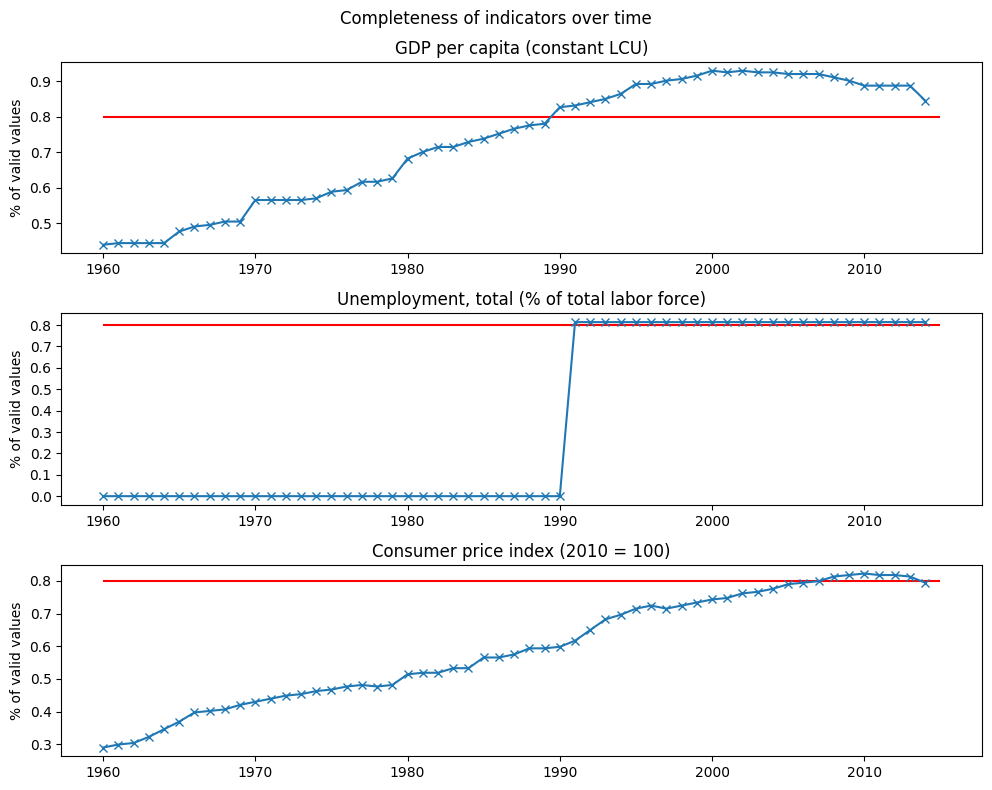

In [28]:
#gdp_series_complete = indicators_table[indicators_table.index.str.contains("GDP")]
gdp_series = data_table.loc[relevant_indicators["gdp"], :]

#unemployment_series_complete = indicators_table[indicators_table.index.str.contains("Unemployment")]
unemployment_series = data_table.loc[relevant_indicators["unemployment"], :]

#price_index_series_complete = indicators_table[indicators_table.index.str.contains("price index")]
price_index_series = data_table.loc[relevant_indicators["cpi"], :]

plot_series_list([gdp_series, unemployment_series, price_index_series], 'Completeness of indicators over time')

In [29]:
#Looking at the graphs, it's visible there's a lot of incomplete data roughly before 1995.
#All samples prior to 1995 will be dropped.
#All samples for indicators that are not the 3 displayed above will also be dropped.

In [47]:
"""Building new dataset"""

# Drop unnecessary rows 
new_data = data[data['CountryName'].isin(countries)]
new_data = new_data[new_data['IndicatorName'].isin(relevant_indicators.values())]
new_data = new_data[new_data['Year'] > 1995]


# Drop unnecessary columns
new_data = new_data.drop(columns=["CountryCode", "IndicatorCode"])

new_data.head()

,CountryName,IndicatorName,Year,Value
2637209,Afghanistan,"Unemployment, total (% of total labor force)",1996,8.400000
2637314,Albania,Consumer price index (2010 = 100),1996,45.950036
2637425,Albania,GDP per capita (constant LCU),1996,109343.313362
2637954,Albania,"Unemployment, total (% of total labor force)",1996,15.600000
2638057,Algeria,Consumer price index (2010 = 100),1996,61.630411


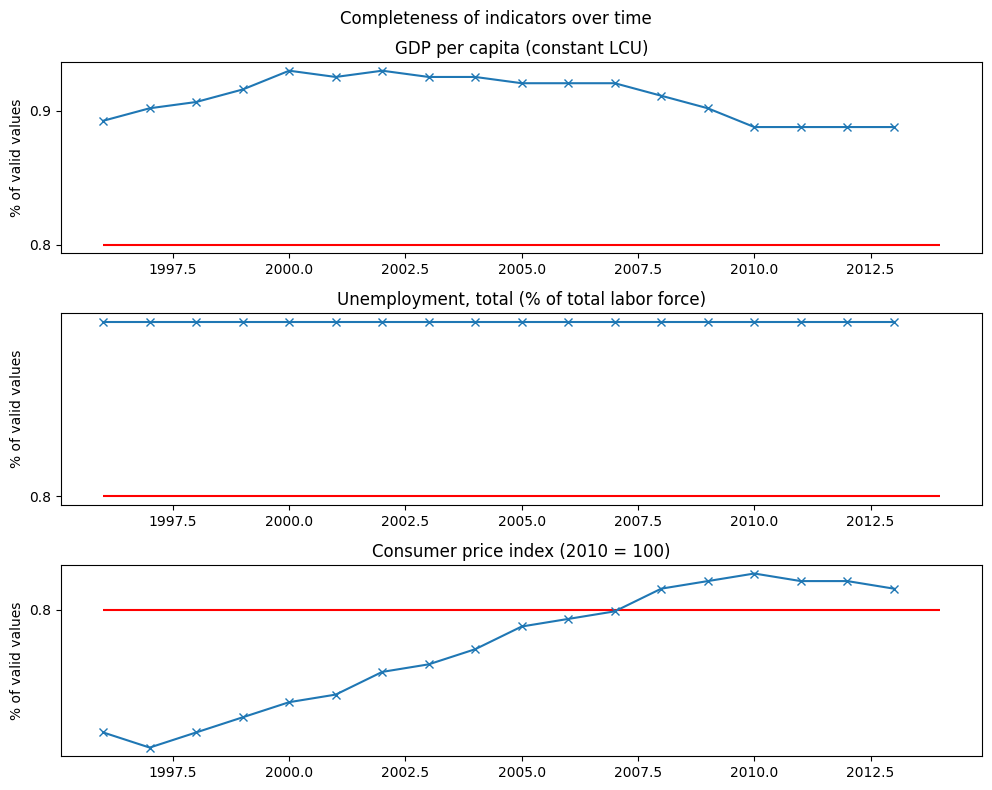

In [48]:
# Explore indicators for new dataset
new_data_table = new_data.pivot_table(index=['IndicatorName'], columns=['Year'], values='Value', aggfunc=adjusted_count)
new_data_table.fillna(value=0, inplace=True)

new_gdp_series = new_data_table.loc['GDP per capita (constant LCU)', :]
new_unemployment_series = new_data_table.loc['Unemployment, total (% of total labor force)', :]
new_price_index_series = new_data_table.loc['Consumer price index (2010 = 100)', :]

plot_series_list([new_gdp_series, new_unemployment_series, new_price_index_series], 'Completeness of indicators over time')

In [32]:
#print(new_data['CountryName'].unique())
#print(new_data['Year'].unique())
#print(new_data['IndicatorName'].unique())

In [54]:
#new_data = new_data.drop(columns=['CountryCode', 'IndicatorCode'])
idx = pd.MultiIndex.from_product([new_data['CountryName'].unique(), 
                                  new_data['IndicatorName'].unique(),
                                  new_data['Year'].unique()], names=["CountryName", "IndicatorName", "Year"])
                                  
new_data = new_data.set_index(["CountryName", "IndicatorName", "Year"]).reindex(idx).reset_index()

a = new_data[new_data['CountryName'] == 'Afghanistan']
a = a[a['IndicatorName'] == relevant_indicators['cpi']]
a

,CountryName,IndicatorName,Year,Value
19,Afghanistan,Consumer price index (2010 = 100),1996,NaN
20,Afghanistan,Consumer price index (2010 = 100),1997,NaN
21,Afghanistan,Consumer price index (2010 = 100),1998,NaN
22,Afghanistan,Consumer price index (2010 = 100),1999,NaN
23,Afghanistan,Consumer price index (2010 = 100),2000,NaN
24,Afghanistan,Consumer price index (2010 = 100),2001,NaN
25,Afghanistan,Consumer price index (2010 = 100),2002,NaN
26,Afghanistan,Consumer price index (2010 = 100),2003,NaN
27,Afghanistan,Consumer price index (2010 = 100),2004,63.131893
28,Afghanistan,Consumer price index (2010 = 100),2005,71.140974


In [ ]:
# TODO
#- Find out how to use df.interpolate() to fill in missing values